# **Dual Degree Alumni Data Visualizations**
### Instructions: README
Please download the dual_degree_data folder found in the associated shared GDrive. Upload the dual_degree_data to the files section of this notebook by right clicking and adding a new folder. **Please ensure the folder is titled 'dual_degree_data' and includes the following 3 csv files:**

- 'alumni_master.csv'
- 'updated_alumni.csv'
- 'worldcities.csv'

**If the csv files are not stored properly in the files section of this notebook, the code will not run.**

Please run cells by using the key sequence shift + enter. Only run cells in order and be sure to run the first import cell.

This notebook is written in Python 3.6+.


In [1]:
# Please run this cell
import pandas as pd
import numpy as np
import plotly.express as px
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


## Survey Responses

In [2]:
# import master alumni data
master = pd.read_csv('dual_degree_data/alumni_master.csv')
master = master.drop(columns = ['Name', 'Pronouns', 'Email', 'LinkedIn',
                                'Agree to Share'])
master

,Filled Out Survey?,Campus,Graduation Year,Current Location,Grad School,Professional Employment
0,True,Paris,2017,San Francisco,"Georgia Tech, Online Master in Analytics",Data Scientist at YouTube
1,False,Nancy,2017,NaN,NaN,NaN
2,False,Paris,2017,NaN,NaN,NaN
3,False,Paris,2017,NaN,NaN,NaN
4,False,Paris,2017,NaN,NaN,NaN
...,...,...,...,...,...,...
78,False,Poiteirs,2022,NaN,NaN,NaN
79,True,Menton,2022,San Francisco,NaN,Analyst at Forward
80,True,Le Havre,2022,"New York, NY",Columbia SIPA Master of International Affairs,NaN
81,True,Reims,2022,Paris,Master at Sciences Po: PSIA International Secu...,NaN


### Data Cleaning

The free response structure of the survey requires data cleaning. Such cleaning includes parsing long answers, fixing formatting, removing duplicate entries, and working around missing values. Throughout this notebook, I will clean the data and create new data frames to explore and visualize the alumni's answers.

## **Alumni Current Locations**

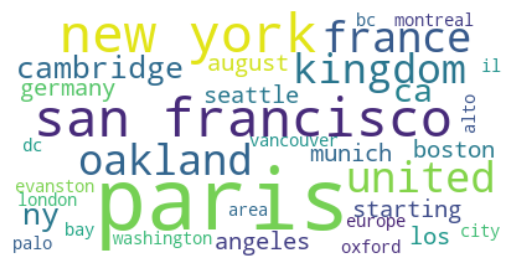

In [3]:
# Word Cloud List of Current Locations
world_text = master['Current Location'].str.lower().fillna(0).tolist()
world_textlst = [x for x in world_text if x != 0]
world_text = ' '.join(world_textlst)
world_text
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(world_text)

# # Display the generated image:
wordcloud = WordCloud(max_words=100, background_color="white").generate(world_text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [4]:
# cluster identical cities
val_count = master['Current Location'].value_counts()
cities = master['Current Location'].fillna('')

def count_city(cities, city_lst):
    ct = 0
    for x in cities:
        for option in city_lst:
            if option in x:
                ct += 1
    return ct

# count number of alumni in each city
paris_count = count_city(cities, ["Paris", "France"])
# include all bay area cities as SF
bay_count = count_city(cities, ["San Francisco", "Oakland", "Palo Alto", "Bay Area"])
nyc_count = count_city(cities, ["New York"])
# include UK cities as London
london_count = count_city(cities, ["London", "United Kingdom", "Europe"])
seattle_count = count_city(cities, ["Seattle"])
la_count = count_city(cities, ["Los Angeles"])
evan_count = count_city(cities, ["Evanston"])
montreal_count = count_city(cities, ["Montreal"])
germany_count = count_city(cities, ["Germany"])
dc_count = count_city(cities, ["DC"])
boston_count = count_city(cities, ["Boston"])
vancouver_count = count_city(cities, ["Vancouver"])
counts = [paris_count, bay_count, nyc_count, london_count, seattle_count,
          la_count, evan_count, montreal_count, germany_count, dc_count,
         boston_count, vancouver_count]

# create df to join with worldcities
data = {'city': ["Paris", "San Francisco", "New York",
                   "London", "Seattle", "Los Angeles", "Evanston",
                   "Montréal", "Munich", "Washington", "Boston",
                   "Vancouver"],
        'country':['France', 'United States', 'United States',
                   'United Kingdom', 'United States', 'United States',
                   'United States', 'Canada', 'Germany', 'United States',
                   'United States', 'Canada'],
        'admin_name': ['Île-de-France', 'California', 'New York',
                       'London, City of','Washington', 'California',
                        'Illinois', 'Quebec','Bavaria',
                       'District of Columbia','Massachusetts',
                       'British Columbia'],
        'count': counts}
city_cts = pd.DataFrame(data)
city_cts

,city,country,admin_name,count
0,Paris,France,Île-de-France,24
1,San Francisco,United States,California,10
2,New York,United States,New York,5
3,London,United Kingdom,"London, City of",5
4,Seattle,United States,Washington,1
5,Los Angeles,United States,California,1
6,Evanston,United States,Illinois,1
7,Montréal,Canada,Quebec,1
8,Munich,Germany,Bavaria,1
9,Washington,United States,District of Columbia,1


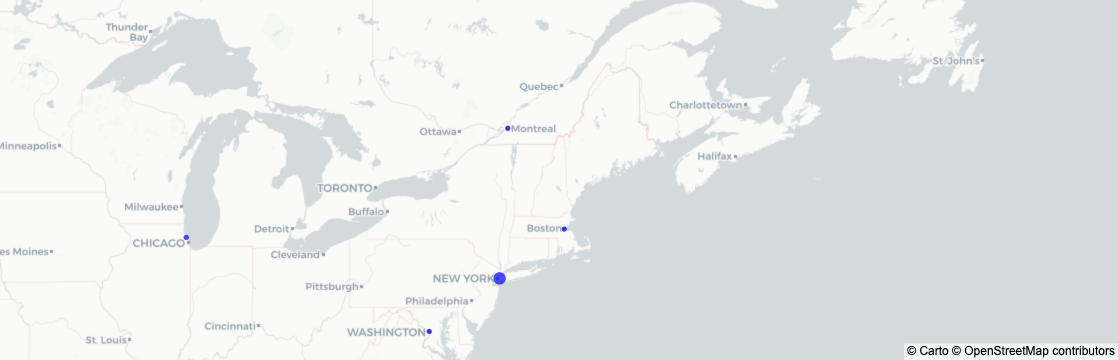

In [8]:
# create a map with circles around populated areas
import sys, requests, urllib
from pathlib import Path
# from zipfile import ZipFile

# join cities df with worldcities df to get lat and long
worldcities = pd.read_csv('dual_degree_data/worldcities.csv')
merger = city_cts.merge(worldcities, on=['city', 'country', 'admin_name'], how='left', indicator=True)
cols_to_keep = ['city', 'country', 'admin_name', 'count', 'lat', 'lng']
merger = merger.loc[:, cols_to_keep]
merger

# show map
px.scatter_mapbox(
    merger,
    lat="lat",
    lon="lng",
    hover_name="city",
    size="count",
    color_discrete_sequence=['blue', 'red']
).update_layout(mapbox={"style": "carto-positron", "zoom": 4}, margin={"t":0,"b":0,"l":0,"r":0})

## Alumni Professional Career Data

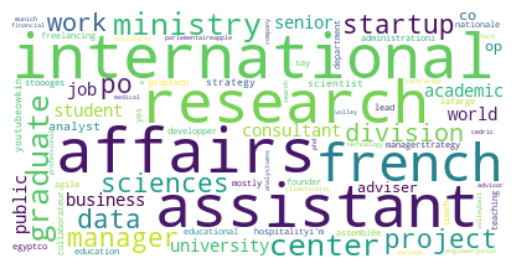

In [9]:
# Word Cloud List of Descriptions
text = master['Professional Employment'].str.lower().fillna(0).tolist()
textlst = [x for x in text if x != 0]
text = ''.join(textlst)
text
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# # Display the generated image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Professional Career Pie Chart by Industry

In [10]:
# create industry list according to professional employment response
master['Professional Employment'] = master['Professional Employment'].str.lower()

industries = ['Tech', 'Academia', 'Legal', 'Finance', 'Medical',
              'Government', 'Entrepreneurship', 'Sports & Entertainment',
              'Arts & Culture']

# use keywords dictionary to return industry associated with their professional employment description
keywords = {'Tech': ['data', 'apple', 'hamilton place strategies', 'analysis',
                     'libeo', 'owkin', 'proptech', 'hive', 'tech'],
            'Legal': ['law', 'legal', 'allen & overy'],
           'Finance': ['economic', 'financial'],
            'Marketing': ['marketing', 'sales'],
            'Medical': ['medical'],
            'Politics': ['climat', 'political', 'ministry',
                         'parlementaire', 'french administration'],
            'Entreprenuership': ['contractor', 'freelancing', 'contract', 'co founder'],
            'Sports & Entertainment': ['volley'],
            'Arts & Culture': ['jewish', 'arts'],
            'Academia': ['research', 'graduate', 'academic', 'student', 'teaching', 'education', 'sciences po']
           }

keywords.values()

def find_industry(jobs):
    industry = []
    for job in jobs:
        for (key, kw) in keywords.items():
            if (match_keywords(kw, job)):
                industry.append((key, job))
    return industry

# helper function
def match_keywords(keywords, job):
    for word in job.split():
        if (word in keywords):
            return True
    return False

industries = find_industry(master['Professional Employment'].fillna('no'))

# returns list containing tuples of (job description, industry)
def get_industry(tuplelist):
    first = []
    for tuples in tuplelist:
        first.append(tuples[0])
    return first

# create industry counts df to use for pie chart visualization
industrylist = get_industry(industries)
x = pd.DataFrame(industrylist)
industry_ct = x.value_counts()
industry_df = pd.DataFrame({'Count':industry_ct}).reset_index()
industry_df = industry_df.rename(columns = {0: 'Industry'})
industry_df

,Industry,Count
0,Academia,9
1,Tech,8
2,Politics,5
3,Arts & Culture,2
4,Finance,2
5,Entreprenuership,1
6,Legal,1
7,Marketing,1
8,Medical,1
9,Sports & Entertainment,1


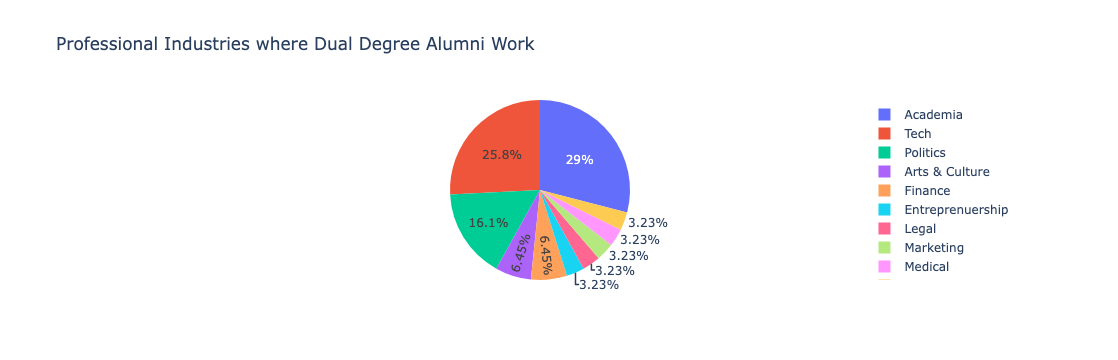

In [11]:
# only going to use percentages based on those who answered question so that data does not seem insignificant
# fig = px.pie(df, values='pop', names='country', title='Population of European continent')
# fig.show()

industry_pie = px.pie(industry_df, values='Count', names='Industry', title='Professional Industries where Dual Degree Alumni Work')
industry_pie.show()



## **Grad School Data**

While keeping in mind that only 43% of survey respondents filled out questions about grad school, we will visualize the 35 complete answers received and assume those who did not respond have not attended grad school.

### **Percentage of Alumni that went to Grad School**

In [12]:
master['Grad School'] = master['Grad School'].str.lower().fillna(0)
x = master[master['Grad School'] != 0]
gradschool_percent = len(x['Grad School']) / len(master['Grad School']) * 100
print("{0:.2f}% of dual-degree alumni attended a graduate program.".format(gradschool_percent))

# 43.37% filled out where they went to grad school while only 41% included both a school and program

43.37% of dual-degree alumni attended a graduate program.


### **Grad Schools / Grad School Fields**

In [13]:
# alumni master sheet with 2 new columns: Grad School Name & Grad School Field
updated = pd.read_csv('dual_degree_data/updated_alumni.csv')

# create df with grad school columns
gradschool = updated.loc[:, ['Grad School', 'Grad School Name', 'Grad School Field']].fillna(0)
gradschool = gradschool[gradschool['Grad School Name'] != 0]

# remove leading and tailing spaces
names = [name.strip() for name in gradschool['Grad School Name']]
gradschool['Grad School Name'] = names

In [14]:
# count how many repeats of school
unique = gradschool['Grad School Name'].value_counts()

# df with count of alumni who ended up at each school
schoolct_df = pd.DataFrame(unique).reset_index().rename(columns={'index':'Grad School Name', 'Grad School Name':'Count'})
schoolct_df


,Grad School Name,Count
0,Sciences Po,16
1,HEC Paris,3
2,Harvard,2
3,London School of Economics,2
4,University of Cambridge,2
5,Georgia Tech,1
6,University of Southern California,1
7,Georgetown,1
8,University of St. Gallen,1
9,University of Oxford,1


## **Percentage of Alumni who attended Grad Schools**

In [17]:
# find percent of alumni at each school
study_percent = [num/np.sum(schoolct_df['Count']) for num in unique]
schoolct_df['Percent of Alumni'] = study_percent
sp_percent =  round(schoolct_df['Percent of Alumni'][0] *100,2)
print("{0}% of graduate alumni attended a graduate program at Sciences Po.".format(sp_percent))
schoolct_df

45.71% of graduate alumni attended a graduate program at Sciences Po.


,Grad School Name,Count,Percent of Alumni
0,Sciences Po,16,0.457143
1,HEC Paris,3,0.085714
2,Harvard,2,0.057143
3,London School of Economics,2,0.057143
4,University of Cambridge,2,0.057143
5,Georgia Tech,1,0.028571
6,University of Southern California,1,0.028571
7,Georgetown,1,0.028571
8,University of St. Gallen,1,0.028571
9,University of Oxford,1,0.028571


In [18]:
# df with grad field and count of alumni
g = gradschool[gradschool['Grad School Field'] != 0]['Grad School Field'].str.split(' and ')
gradfieldslst = [item for sublist in g for item in sublist]
gdata = [item.strip() for item in gradfieldslst]
gradfields = pd.DataFrame(gdata)
field_data = gradfields.value_counts()
fieldct_df = pd.DataFrame(field_data)
fieldct_df = fieldct_df.rename(columns={0: 'Field Count'}).reset_index().rename(columns={0:'Grad Field'})

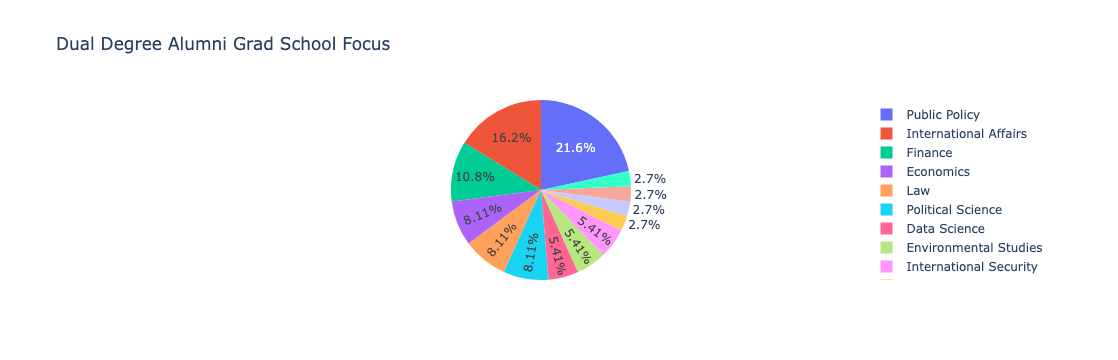

In [19]:
# create pie chart visualization of grad school fields
field_pie = px.pie(fieldct_df, values='Field Count', names='Grad Field', title="Dual Degree Alumni Grad School Focus")
field_pie.show()